In [2]:
import pandas as pd
data = pd.read_csv("data.csv")
types = ["DATE","AWND","PRCP","SNOW","SNWD","WDF2","WDF5","WSF2","WSF5"]
data.dropna(subset=types, inplace=True)
X = []
for i in types:
    X.append(data[i].tolist())
import datetime
for i in range(len(X[0])):
    X[0][i]=datetime.datetime.strptime(X[0][i],'%Y-%m-%d').timetuple().tm_yday
Y = data["TAVG"].tolist()
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [3]:
X_TRAIN = X [:,:-370]
Y_TRAIN = Y [:-370]
X_TEST = X [:,-370:-2]
Y_TEST = Y [-370:-2]
X_TRAIN = X_TRAIN.transpose()
X_TEST = X_TEST.transpose()
DATE = data["DATE"].to_list()[-370:-2]

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_TRAIN,Y_TRAIN)
ans = model.predict(X_TEST)

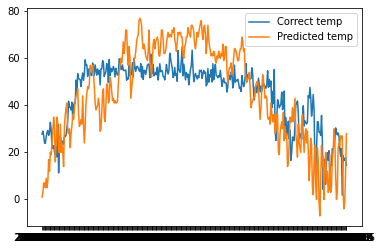

In [6]:
import matplotlib.pyplot as plt
plt.plot(DATE,ans,label='Correct temp')
plt.plot(DATE,Y_TEST,label='Predicted temp')
plt.legend(loc='upper right')